In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depth-estimation/imgs2csv.py
/kaggle/input/depth-estimation/predictions.csv
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/6401281.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/6901381.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/35207041.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/230461.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/15403082.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/33606721.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/18203641.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/40108021.png
/kaggle/input/depth-estimation/competition-data/competition-data/validation/images/32906581.png
/kaggle/input/depth-estimation/competition-data/co

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [4]:

def load_images(image_folder, depth_folder, num_samples=5):
    image_files = sorted(os.listdir(image_folder))[:num_samples]
    depth_files = sorted(os.listdir(depth_folder))[:num_samples]
    
    images, depths = [], []
    
    for img_file, depth_file in zip(image_files, depth_files):
        img_path = os.path.join(image_folder, img_file)
        depth_path = os.path.join(depth_folder, depth_file)
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
        
        images.append(image)
        depths.append(depth)
    
    return images, depths

def visualize_samples(images, depths, num_samples=5):
    plt.figure(figsize=(10, num_samples * 3))
    
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(images[i])
        plt.title("RGB Image")
        plt.axis("off")
        
        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(depths[i], cmap="plasma")
        plt.title("Depth Map")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()



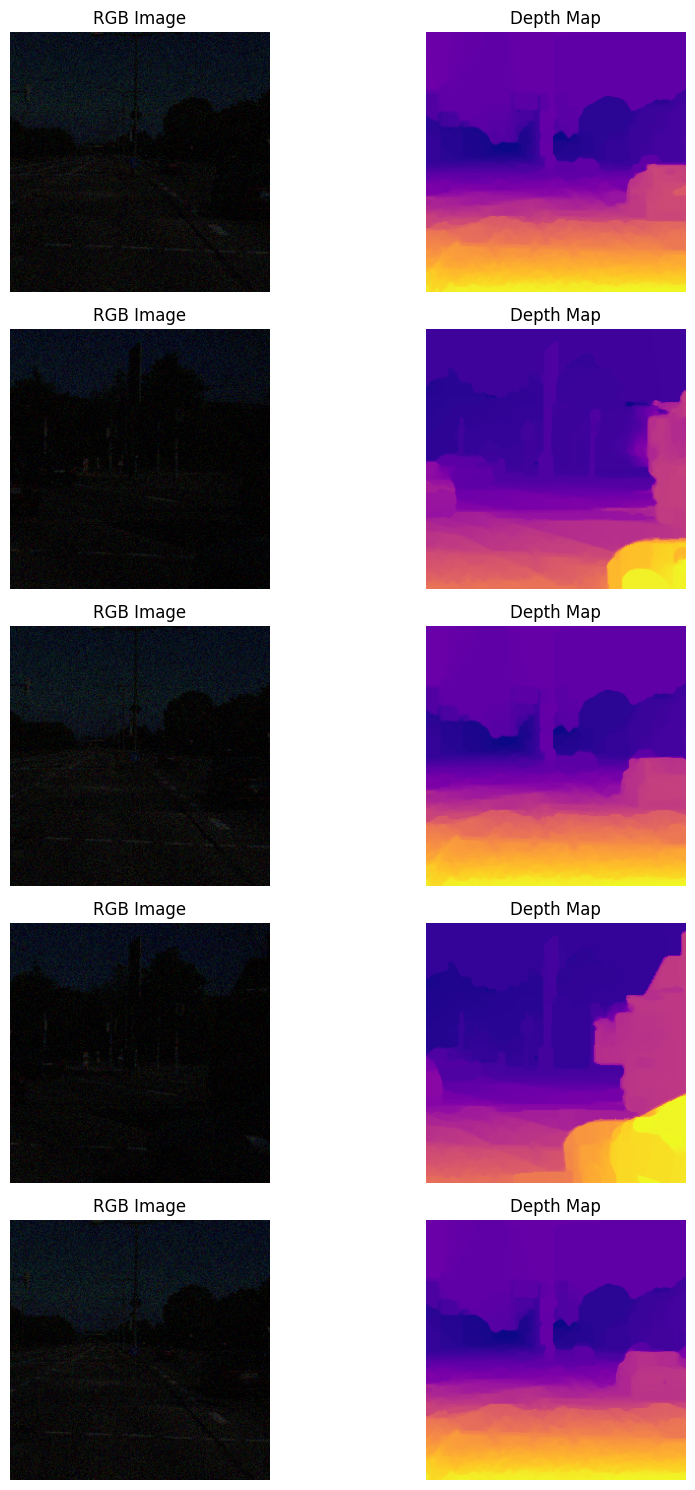

In [6]:
# Set dataset paths
train_images = "/kaggle/input/depth-estimation/competition-data/competition-data/training/images"
train_depth = "/kaggle/input/depth-estimation/competition-data/competition-data/training/depths"

# Load and visualize
images, depths = load_images(train_images, train_depth)
visualize_samples(images, depths)


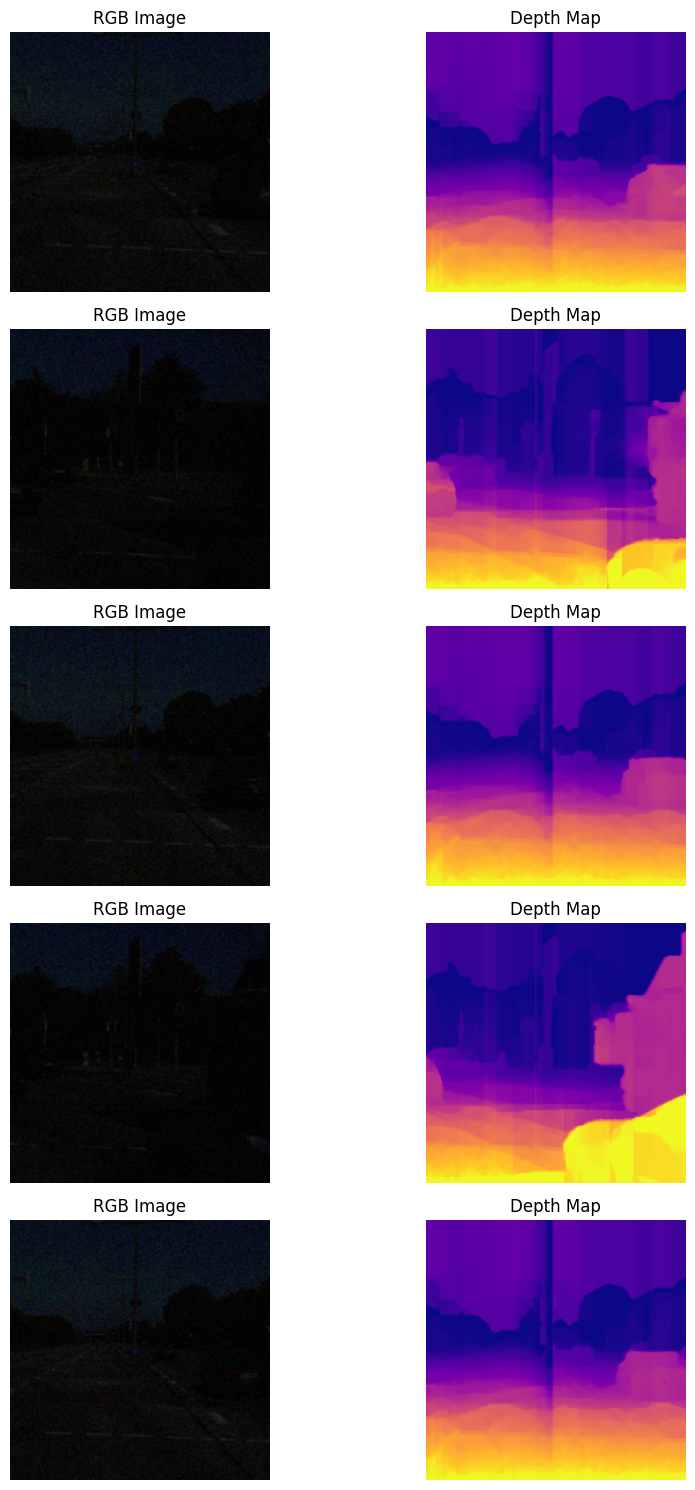

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def load_images(image_folder, depth_folder, num_samples=5, img_size=(224, 224)):
    image_files = sorted(os.listdir(image_folder))[:num_samples]
    depth_files = sorted(os.listdir(depth_folder))[:num_samples]
    
    images, depths = [], []
    
    for img_file, depth_file in zip(image_files, depth_files):
        img_path = os.path.join(image_folder, img_file)
        depth_path = os.path.join(depth_folder, depth_file)
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, img_size) / 255.0  # Normalize to [0,1]
        
        depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
        depth = cv2.resize(depth, img_size)
        depth = MinMaxScaler().fit_transform(depth)  # Normalize depth to [0,1]
        
        images.append(image)
        depths.append(depth)
    
    return np.array(images), np.array(depths)

def visualize_samples(images, depths, num_samples=5):
    plt.figure(figsize=(10, num_samples * 3))
    
    for i in range(num_samples):
        plt.subplot(num_samples, 2, 2*i + 1)
        plt.imshow(images[i])
        plt.title("RGB Image")
        plt.axis("off")
        
        plt.subplot(num_samples, 2, 2*i + 2)
        plt.imshow(depths[i], cmap="plasma")
        plt.title("Depth Map")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Set dataset paths
train_images = "/kaggle/input/depth-estimation/competition-data/competition-data/training/images"
train_depth = "/kaggle/input/depth-estimation/competition-data/competition-data/training/depths"

# Load and visualize
images, depths = load_images(train_images, train_depth)
visualize_samples(images, depths)


In [11]:
# import os
# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torchvision.transforms as transforms
# from sklearn.preprocessing import MinMaxScaler
# from torchvision.models import vit_b_16, ViT_B_16_Weights
# from torch.utils.data import Dataset, DataLoader
# from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error

# # Dataset class
# class DepthDataset(Dataset):
#     def __init__(self, image_folder, depth_folder, img_size=(224, 224)):
#         self.image_files = sorted(os.listdir(image_folder))
#         self.depth_files = sorted(os.listdir(depth_folder))
#         self.image_folder = image_folder
#         self.depth_folder = depth_folder
#         self.img_size = img_size
#         self.transform = transforms.Compose([
#             transforms.ToTensor(),
#             transforms.Resize(self.img_size),
#         ])
    
#     def __len__(self):
#         return len(self.image_files)
    
#     def __getitem__(self, idx):
#         img_path = os.path.join(self.image_folder, self.image_files[idx])
#         depth_path = os.path.join(self.depth_folder, self.depth_files[idx])
        
#         # Load and resize image
#         image = cv2.imread(img_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, self.img_size) / 255.0  # Normalize
        
#         # Load and resize depth map
#         depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
#         depth = cv2.resize(depth, self.img_size)
#         depth = MinMaxScaler().fit_transform(depth)  # Normalize depth
        
#         # Convert to tensors
#         image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
#         depth = torch.tensor(depth, dtype=torch.float32).unsqueeze(0)
        
#         return image, depth

# # Define model
# class ViTDepth(nn.Module):
#     def __init__(self):
#         super(ViTDepth, self).__init__()
#         self.vit = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
#         self.vit.heads = nn.Linear(self.vit.heads.head.in_features, 224 * 224)  # Output flattened depth map
    
#     def forward(self, x):
#         x = self.vit(x)
#         return x.view(-1, 1, 224, 224)  # Reshape to depth map

# # Training function
# def train_model(model, train_loader, epochs=5, lr=1e-4):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=lr)
    
#     for epoch in range(epochs):
#         model.train()
#         total_loss = 0
#         all_preds, all_targets = [], []
        
#         for images, depths in train_loader:
#             images, depths = images.to(device), depths.to(device)
#             optimizer.zero_grad()
#             outputs = model(images)
#             loss = criterion(outputs, depths)
#             loss.backward()
#             optimizer.step()
#             total_loss += loss.item()
            
#             all_preds.append(outputs.detach().cpu().numpy().flatten())
#             all_targets.append(depths.detach().cpu().numpy().flatten())
        
#         mse = mean_squared_error(np.concatenate(all_targets), np.concatenate(all_preds))
#         auc = roc_auc_score(np.concatenate(all_targets), np.concatenate(all_preds))
#         accuracy = accuracy_score(np.round(np.concatenate(all_targets)), np.round(np.concatenate(all_preds)))
        
#         print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, MSE: {mse:.4f}, AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")
    
#     return model

# # Set dataset paths
# train_images = "/kaggle/input/depth-estimation/competition-data/competition-data/training/images"
# train_depth = "/kaggle/input/depth-estimation/competition-data/competition-data/training/depths"

# # Load dataset and create DataLoader
# dataset = DepthDataset(train_images, train_depth)
# train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# # Initialize and train model
# model = ViTDepth()
# trained_model = train_model(model, train_loader)

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from sklearn.preprocessing import MinMaxScaler
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error
from tqdm import tqdm

# Dataset class
class DepthDataset(Dataset):
    def __init__(self, image_folder, depth_folder, img_size=(224, 224)):
        self.image_files = sorted(os.listdir(image_folder))
        self.depth_files = sorted(os.listdir(depth_folder))
        self.image_folder = image_folder
        self.depth_folder = depth_folder
        self.img_size = img_size
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize(self.img_size),
        ])
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_files[idx])
        depth_path = os.path.join(self.depth_folder, self.depth_files[idx])
        
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, self.img_size) / 255.0
        depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
        depth = cv2.resize(depth, self.img_size)
        depth = MinMaxScaler().fit_transform(depth)
        
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
        depth = torch.tensor(depth, dtype=torch.float32).unsqueeze(0)
        
        return image, depth

# Define model
class ViTDepth(nn.Module):
    def __init__(self):
        super(ViTDepth, self).__init__()
        self.vit = vit_b_16(weights=ViT_B_16_Weights.IMAGENET1K_V1)
        self.vit.heads = nn.Linear(self.vit.heads.head.in_features, 224 * 224)  # Output flattened depth map
    
    def forward(self, x):
        x = self.vit(x)
        return x.view(-1, 1, 224, 224)  # Reshape to depth map

# Training function
def train_model(model, train_loader, val_loader, epochs=35, lr=1e-4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        all_preds, all_targets = [], []
        
        loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for images, depths in loop:
            images, depths = images.to(device), depths.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, depths)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            
            all_preds.append(outputs.detach().cpu().numpy().flatten())
            all_targets.append(depths.detach().cpu().numpy().flatten())
            
            loop.set_postfix(loss=total_loss / len(train_loader))
        
        # Validation phase
        model.eval()
        val_loss, val_preds, val_targets = 0, [], []
        with torch.no_grad():
            for images, depths in val_loader:
                images, depths = images.to(device), depths.to(device)
                outputs = model(images)
                loss = criterion(outputs, depths)
                val_loss += loss.item()
                val_preds.append(outputs.detach().cpu().numpy().flatten())
                val_targets.append(depths.detach().cpu().numpy().flatten())
        
        mse = mean_squared_error(np.concatenate(val_targets), np.concatenate(val_preds))
        #auc = roc_auc_score(np.concatenate(val_targets), np.concatenate(val_preds))
        accuracy = accuracy_score(np.round(np.concatenate(val_targets)), np.round(np.concatenate(val_preds)))
        mse = mean_squared_error(np.concatenate(val_targets), np.concatenate(val_preds))
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, MSE: {mse:.4f}")

        #print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}, MSE: {mse:.4f}, AUC: {auc:.4f}, Accuracy: {accuracy:.4f}")
    
    return model

# Set dataset paths
train_images = "/kaggle/input/depth-estimation/competition-data/competition-data/training/images"
train_depth = "/kaggle/input/depth-estimation/competition-data/competition-data/training/depths"
val_images = "/kaggle/input/depth-estimation/competition-data/competition-data/validation/images"
val_depth = "/kaggle/input/depth-estimation/competition-data/competition-data/validation/depths"

# Load dataset and create DataLoader
dataset_train = DepthDataset(train_images, train_depth)
dataset_val = DepthDataset(val_images, val_depth)
train_loader = DataLoader(dataset_train, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=16, shuffle=False)

# Initialize and train model
model = ViTDepth()
trained_model = train_model(model, train_loader, val_loader)


Epoch 1/35: 100%|██████████| 418/418 [02:59<00:00,  2.32it/s, loss=0.0286]


Epoch 1/35, Loss: 0.0286, Val Loss: 0.0199, MSE: 0.0200


Epoch 2/35: 100%|██████████| 418/418 [02:58<00:00,  2.34it/s, loss=0.019]  


Epoch 2/35, Loss: 0.0190, Val Loss: 0.0178, MSE: 0.0180


Epoch 3/35: 100%|██████████| 418/418 [03:00<00:00,  2.31it/s, loss=0.0171] 


Epoch 3/35, Loss: 0.0171, Val Loss: 0.0164, MSE: 0.0164


Epoch 4/35: 100%|██████████| 418/418 [02:58<00:00,  2.34it/s, loss=0.0158] 


Epoch 4/35, Loss: 0.0158, Val Loss: 0.0155, MSE: 0.0156


Epoch 5/35: 100%|██████████| 418/418 [02:58<00:00,  2.34it/s, loss=0.0146] 


Epoch 5/35, Loss: 0.0146, Val Loss: 0.0147, MSE: 0.0148


Epoch 6/35: 100%|██████████| 418/418 [02:59<00:00,  2.33it/s, loss=0.0134] 


Epoch 6/35, Loss: 0.0134, Val Loss: 0.0131, MSE: 0.0132


Epoch 7/35: 100%|██████████| 418/418 [02:58<00:00,  2.34it/s, loss=0.0121] 


Epoch 7/35, Loss: 0.0121, Val Loss: 0.0119, MSE: 0.0120


Epoch 8/35:  77%|███████▋  | 320/418 [02:17<00:41,  2.34it/s, loss=0.00844]

In [17]:
# import os
# import cv2
# import torch
# import numpy as np
# import pandas as pd
# from torch.utils.data import Dataset, DataLoader
# from tqdm import tqdm

# # Test Dataset Class
# class TestDepthDataset(Dataset):
#     def __init__(self, image_folder, img_size=(224, 224)):
#         self.image_files = sorted(os.listdir(image_folder))
#         self.image_folder = image_folder
#         self.img_size = img_size
    
#     def __len__(self):
#         return len(self.image_files)
    
#     def __getitem__(self, idx):
#         img_path = os.path.join(self.image_folder, self.image_files[idx])
#         image = cv2.imread(img_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, self.img_size) / 255.0
#         image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
#         return image, self.image_files[idx]  # Return filename for saving

# # Function to generate predictions
# def predict_and_save(model, test_loader, output_folder):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)
#     model.eval()

#     os.makedirs(output_folder, exist_ok=True)

#     with torch.no_grad():
#         for images, filenames in tqdm(test_loader, desc="Generating Predictions"):
#             images = images.to(device)
#             outputs = model(images).cpu().numpy()

#             for i in range(len(outputs)):
#                 depth_map = outputs[i][0]  # Extract depth map
#                 depth_map = (depth_map - np.min(depth_map)) / (np.max(depth_map) - np.min(depth_map) + 1e-6)  # Normalize
#                 depth_map = np.uint8(depth_map * 255)  # Convert to 8-bit grayscale

#                 image_filename = os.path.join(output_folder, filenames[i])
#                 cv2.imwrite(image_filename, depth_map)

# # Set paths
# test_images = "/kaggle/input/depth-estimation/competition-data/competition-data/testing/images"
# output_folder = "test_predictions"

# # Load test dataset
# test_dataset = TestDepthDataset(test_images)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# # Generate test predictions
# predict_and_save(trained_model, test_loader, output_folder)

# # Convert images to CSV using imgs2csv.py
# os.system("python imgs2csv.py test_predictions prediction_test.csv")

# print("Predictions saved as prediction_test.csv")


Generating Predictions: 100%|██████████| 53/53 [00:12<00:00,  4.09it/s]

Predictions saved as prediction_test.csv


In [19]:
# import os
# import cv2
# import torch
# import numpy as np
# import pandas as pd
# from torch.utils.data import Dataset, DataLoader
# from tqdm import tqdm

# # Test Dataset Class
# class TestDepthDataset(Dataset):
#     def __init__(self, image_folder, img_size=(224, 224)):
#         self.image_files = sorted(os.listdir(image_folder))
#         self.image_folder = image_folder
#         self.img_size = img_size
    
#     def __len__(self):
#         return len(self.image_files)
    
#     def __getitem__(self, idx):
#         img_path = os.path.join(self.image_folder, self.image_files[idx])
#         image = cv2.imread(img_path)
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = cv2.resize(image, self.img_size) / 255.0
#         image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
#         return image, self.image_files[idx]  # Return filename for saving

# # Function to generate predictions
# def predict_and_save(model, test_loader, output_folder):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)
#     model.eval()

#     os.makedirs(output_folder, exist_ok=True)

#     with torch.no_grad():
#         for images, filenames in tqdm(test_loader, desc="Generating Predictions"):
#             images = images.to(device)
#             outputs = model(images).cpu().numpy()

#             for i in range(len(outputs)):
#                 depth_map = outputs[i][0]  # Extract depth map
#                 depth_map = (depth_map - np.min(depth_map)) / (np.max(depth_map) - np.min(depth_map) + 1e-6)  # Normalize
#                 depth_map = np.uint8(depth_map * 255)  # Convert to 8-bit grayscale

#                 image_filename = os.path.join(output_folder, filenames[i])
#                 cv2.imwrite(image_filename, depth_map)

# # Set paths
# test_images = "/kaggle/input/depth-estimation/competition-data/competition-data/testing/images"
# output_folder = "test_predictions"

# # Load test dataset
# test_dataset = TestDepthDataset(test_images)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# # Generate test predictions
# predict_and_save(trained_model, test_loader, output_folder)

# # Create CSV folder inside Kaggle working directory
# csv_folder = "/kaggle/working/csv"
# os.makedirs(csv_folder, exist_ok=True)

# # Convert images to CSV and save inside csv folder
# csv_path = os.path.join(csv_folder, "prediction_test.csv")
# os.system(f"python imgs2csv.py test_predictions {csv_path}")

# print(f"Predictions saved at: {csv_path}")


Generating Predictions: 100%|██████████| 53/53 [00:08<00:00,  6.10it/s]

Predictions saved at: /kaggle/working/csv/prediction_test.csv


In [22]:
# import os
# print(os.listdir("test_predictions"))  # Check if images are saved


['26155232.png', '10552111.png', '17353472.png', '30556111.png', '16153231.png', '17053411.png', '325652.png', '39257852.png', '41158231.png', '3572.png', '22954592.png', '7851571.png', '31656332.png', '38257652.png', '9951992.png', '34156831.png', '11352271.png', '16153232.png', '5251051.png', '36257251.png', '38357672.png', '8751752.png', '32856571.png', '15053011.png', '6051211.png', '29355871.png', '36657332.png', '32756552.png', '11552311.png', '13152631.png', '40058011.png', '13352672.png', '9151832.png', '36357272.png', '205412.png', '17053412.png', '7651531.png', '19453892.png', '7951591.png', '39957991.png', '225451.png', '41458292.png', '30156031.png', '15853171.png', '28455691.png', '21354271.png', '24054812.png', '26155231.png', '16453292.png', '2552.png', '9351872.png', '15253051.png', '30456092.png', '24754951.png', '165332.png', '33356672.png', '17653531.png', '30356072.png', '6251252.png', '4591.png', '20654131.png', '41258251.png', '29455892.png', '23054612.png', '2605

In [23]:
# import os
# import cv2
# import pandas as pd
# import numpy as np

# def images_to_csv_with_metadata(image_folder, output_csv):
#     data = []
#     for idx, filename in enumerate(sorted(os.listdir(image_folder))):
#         if filename.endswith(".png"):
#             filepath = os.path.join(image_folder, filename)
#             image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
#             image = cv2.resize(image, (128, 128))
#             image = image / 255.
#             image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-6)
#             image = np.uint8(image * 255.)
#             image_flat = image.flatten()
#             row = [idx, filename] + image_flat.tolist()
#             data.append(row)
    
#     num_columns = len(data[0]) - 2 if data else 0
#     column_names = ["id", "ImageID"] + [indx for indx in range(num_columns)]
#     df = pd.DataFrame(data, columns=column_names)

#     os.makedirs("/kaggle/working/csv", exist_ok=True)
#     output_path = "/kaggle/working/csv/prediction_test.csv"
#     df.to_csv(output_path, index=False)
#     print(f"CSV saved at: {output_path}")

# # Generate CSV from test predictions
# images_to_csv_with_metadata("test_predictions", "/kaggle/working/csv/prediction_test.csv")


CSV saved at: /kaggle/working/csv/prediction_test.csv


In [24]:
import os
import cv2
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Test Dataset Class
class TestDepthDataset(Dataset):
    def __init__(self, image_folder, img_size=(224, 224)):
        self.image_files = sorted(os.listdir(image_folder))
        self.image_folder = image_folder
        self.img_size = img_size
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_files[idx])
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, self.img_size) / 255.0
        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)
        return image, self.image_files[idx]  # Return filename for saving

# Function to generate predictions
def predict_and_save(model, test_loader, output_folder):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    os.makedirs(output_folder, exist_ok=True)

    with torch.no_grad():
        for images, filenames in tqdm(test_loader, desc="Generating Predictions"):
            images = images.to(device)
            outputs = model(images).cpu().numpy()

            for i in range(len(outputs)):
                depth_map = outputs[i][0]  # Extract depth map
                depth_map = (depth_map - np.min(depth_map)) / (np.max(depth_map) - np.min(depth_map) + 1e-6)  # Normalize
                depth_map = np.uint8(depth_map * 255)  # Convert to 8-bit grayscale

                image_filename = os.path.join(output_folder, filenames[i])
                cv2.imwrite(image_filename, depth_map)

# Set test dataset paths
test_images = "/kaggle/input/depth-estimation/competition-data/competition-data/testing/images"
output_folder = "/kaggle/working/test_predictions"

# Load test dataset
test_dataset = TestDepthDataset(test_images)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Generate test predictions
predict_and_save(trained_model, test_loader, output_folder)

# Convert images to CSV
def images_to_csv_with_metadata(image_folder, output_csv):
    data = []
    for idx, filename in enumerate(sorted(os.listdir(image_folder))):
        if filename.endswith(".png"):
            filepath = os.path.join(image_folder, filename)
            image = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
            image = cv2.resize(image, (128, 128))
            image = image / 255.
            image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-6)
            image = np.uint8(image * 255.)
            image_flat = image.flatten()
            row = [idx, filename] + image_flat.tolist()
            data.append(row)
    
    num_columns = len(data[0]) - 2 if data else 0
    column_names = ["id", "ImageID"] + [indx for indx in range(num_columns)]
    df = pd.DataFrame(data, columns=column_names)

    os.makedirs("/kaggle/working/csv", exist_ok=True)
    output_path = "/kaggle/working/csv/prediction_v2.csv"
    df.to_csv(output_path, index=False)
    print(f"CSV saved at: {output_path}")

# Generate prediction_v2.csv
images_to_csv_with_metadata(output_folder, "/kaggle/working/csv/prediction_v2.csv")


Generating Predictions: 100%|██████████| 53/53 [00:09<00:00,  5.66it/s]


CSV saved at: /kaggle/working/csv/prediction_v2.csv


In [ ]:
import torch


model_path = "/kaggle/working/depth_model.pth"

# Save the trained model
torch.save(trained_model.state_dict(), model_path)

print(f"Model saved at: {model_path}")
